# Mean Shift Clustering
- make_blobs()를 이용하여 2개의 feature와 3개의 군집 중심점을 가지는 임의의 데이터 200개를 생성하고 Mean Shift를 이용하여 군집화

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

x, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

meanshift_model = MeanShift(bandwidth=0.9)
cluster_labels = meanshift_model.fit_predict(x)
print("cluster labels type: {}".format(np.unique(cluster_labels)))

cluster labels type: [0 1 2 3 4 5 6 7]


In [30]:
# 커널함수의 bandwidth 크기를 1로 증가 후에 군집화
meanshift_model = MeanShift(bandwidth=1.0)
cluster_labels = meanshift_model.fit_predict(x)
print("cluster labels type: {}".format(np.unique(cluster_labels)))

cluster labels type: [0 1 2]


In [31]:
from sklearn.cluster import estimate_bandwidth

cluster = pd.DataFrame(data=x, columns=['feature1', 'feature2'])
cluster['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(x, quantile=0.25)
print("best_bandwidth 값: {}".format(round(best_bandwidth, 3)))

meanshift_model = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift_model.fit_predict(x)
print("cluster labels type: {}".format(np.unique(cluster_labels)))

best_bandwidth 값: 1.689
cluster labels type: [0 1 2]


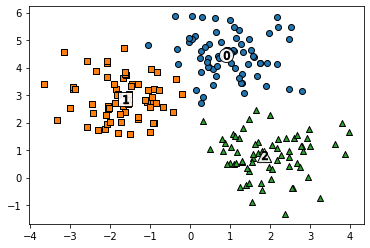

In [32]:
cluster['meanshift_label'] = cluster_labels
centers = meanshift_model.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers = ['o', 's', '^', 'x', '*']
for label in unique_labels:
    label_cluster = cluster[cluster['meanshift_label'] == label]
    center_x_y = centers[label]
    
    # 군집별로 다른 marker로 scatter plot
    plt.scatter(x=label_cluster['feature1'], y=label_cluster['feature2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker="$%d$" % label)

plt.show()